In [35]:
import pandas as pd
import GEOparse

import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
def boxplot_df(df, include_outliers=True):
    x = sns.boxplot(data=df, showfliers = include_outliers)
    x.set(xticklabels=[])
    x.tick_params(bottom=False)
    x.set(xlabel=None)
    plt.show()
    return

def get_n_class(df, cls, n):
    selected = df.loc[df['class']==cls, :]
    selected = selected.sample(frac=1)
    try:
        return selected.iloc[:n, :]
    except:
        return selected

In [18]:
def process_gse(gse, gpl, gpl_id_col):
    
    print("Building gsm dataframe...")
    gsm_rows = []
    for gsm_name, gsm in gse.gsms.items():
        row = gsm.table.set_index('ID_REF').T
        row = row.rename(index={'VALUE': gsm_name})
        gsm_rows.append(row)
        
    df = pd.concat(gsm_rows)

    print("Building translation dictionary...")
    translation = {}
    for col in df.columns:
        gene_symbol = gpl.loc[gpl[gpl_id_col] == col]['Gene Symbol'].iloc[0]
        if not isinstance(gene_symbol, str):
            del df[col]
        else:
            translation[col] = gene_symbol
            
    print("Erasing /// genes symbols (considers the first option)...")
    for key, value in translation.items():
        if len(value.split('///')) > 1:
            translation[key] = value.split('///')[0][0:-1]
        
        
    df = df.rename(columns=translation)
    df = df.astype('float64').mean(axis=1, level=0)
    return df

In [3]:
path = "/home/colombelli/Documents/datasets/cumida/lung/GSE19188/"
gse_code = "GSE19188"

gse = GEOparse.get_GEO(geo=gse_code, destdir=path)

20-Oct-2020 18:05:22 DEBUG utils - Directory /home/colombelli/Documents/datasets/cumida/lung/GSE19188/ already exists. Skipping.
20-Oct-2020 18:05:22 INFO GEOparse - File already exist: using local version.
20-Oct-2020 18:05:22 INFO GEOparse - Parsing /home/colombelli/Documents/datasets/cumida/lung/GSE19188/GSE19188_family.soft.gz: 
20-Oct-2020 18:05:22 DEBUG GEOparse - DATABASE: GeoMiame
20-Oct-2020 18:05:22 DEBUG GEOparse - SERIES: GSE19188
20-Oct-2020 18:05:22 DEBUG GEOparse - PLATFORM: GPL570
/home/colombelli/.local/lib/python3.8/site-packages/GEOparse/GEOparse.py:110: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath, open_kwargs=open_kwargs)
20-Oct-2020 18:05:24 DEBUG GEOparse - SAMPLE: GSM475656
20-Oct-2020 18:05:24 DEBUG GEOparse - SAMPLE: GSM475657
20-Oct-2020 18:05:24 DEBUG GEOparse - SAMPLE: GSM475658
20-Oct-2020 18:05:24 DEBUG GEOparse - SAMPLE: GSM475659
20-Oct-2020 18:05:24 DEBUG GEOparse - SAMPL

20-Oct-2020 18:05:36 DEBUG GEOparse - SAMPLE: GSM475790
20-Oct-2020 18:05:36 DEBUG GEOparse - SAMPLE: GSM475791
20-Oct-2020 18:05:36 DEBUG GEOparse - SAMPLE: GSM475792
20-Oct-2020 18:05:36 DEBUG GEOparse - SAMPLE: GSM475793
20-Oct-2020 18:05:36 DEBUG GEOparse - SAMPLE: GSM475794
20-Oct-2020 18:05:36 DEBUG GEOparse - SAMPLE: GSM475795
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475796
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475797
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475798
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475799
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475800
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475801
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475802
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475803
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475804
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475805
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GSM475806
20-Oct-2020 18:05:37 DEBUG GEOparse - SAMPLE: GS

In [19]:
gpl = next(iter(gse.gpls.values())).table
gpl

,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1007_s_at,U48705,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1,1053_at,M87338,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
2,117_at,X51757,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
3,121_at,X69699,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
4,1255_g_at,L36861,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,B. subtilis /GEN=thrC /DB_XREF=gb:X04603.1 /NO...,AFFX-ThrX-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54671,AFFX-ThrX-M_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,"B. subtilis /GEN=thrC, thrB /DB_XREF=gb:X04603...",AFFX-ThrX-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54672,AFFX-TrpnX-3_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,"B. subtilis /GEN=trpC, trpF /DB_XREF=gb:K01391...",AFFX-TrpnX-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54673,AFFX-TrpnX-5_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,"B. subtilis /GEN=trpE, trpD /DB_XREF=gb:K01391...",AFFX-TrpnX-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df = process_gse(gse, gpl, 'ID')
df

Building gsm dataframe...
Building translation dictionary...
Erasing /// genes symbols (considers the first option)...


ID_REF,DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,CYP2E1,...,RP11-1260E13.2,LOC389641,LOC388210,GALR3,MINOS1-NBL1,NUS1P3,MROH7-TTC4,LOC102725263,FAM86B1,LOC100505915
GSM475656,0.320602,0.417823,-0.038564,0.130232,0.713547,-0.425300,-0.027755,-0.605738,0.374050,0.006623,...,-0.213891,0.070009,0.293033,0.200615,0.278033,-0.588963,-0.074792,1.982685,0.519085,-0.478637
GSM475657,-0.082611,-0.872701,-0.999178,-0.108468,-0.187532,0.195445,-0.011489,0.397370,0.822972,-0.092607,...,0.535132,-0.152937,-0.145307,0.097210,0.108968,-0.290638,-0.163718,-0.197410,0.005645,0.230836
GSM475658,-0.566773,-0.171459,-0.007490,-0.326087,-0.475106,0.480137,0.060018,0.588726,0.196761,0.260175,...,0.217072,-0.356006,0.027120,-0.497537,0.721389,-0.325815,0.073686,-0.275432,0.125124,-0.156551
GSM475659,-0.576433,-0.457648,-0.794457,-0.203678,-0.309903,0.648519,0.100617,0.432092,0.800330,0.017757,...,0.201950,-0.231574,-0.242351,-0.168540,0.824959,-0.283788,0.203977,-0.316308,-0.565165,-0.072088
GSM475660,-0.063671,-0.534894,-0.379396,0.203799,0.014586,0.509231,0.192273,0.270727,-0.240365,-0.110374,...,0.079965,0.212636,-0.499044,0.451486,0.786935,-0.360255,-0.250598,-0.151424,0.203637,-0.112054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM475807,-1.362967,-0.360705,-0.365315,0.013773,-0.059107,0.511825,0.079666,-0.269451,0.245665,0.307735,...,-0.179159,-0.042626,0.489858,-0.252423,0.564892,-0.297481,0.106435,0.013555,-0.426082,-0.412258
GSM475808,1.746057,-0.232797,1.142182,-0.329649,-0.051173,-0.824056,-0.463792,0.382843,-0.657156,-0.082961,...,-0.623840,0.111074,0.059249,-0.359433,0.223437,0.003848,0.728029,0.738014,0.372684,-0.382586
GSM475809,-0.335663,-0.381961,0.477922,-0.097282,-0.377584,0.610227,-0.136984,0.226296,1.830019,-0.152723,...,0.051190,-0.120934,-0.229083,0.044973,0.331389,0.254455,-0.268171,-0.098316,0.040531,0.379213
GSM475810,0.162101,-0.414464,-0.583495,-0.083815,0.280717,-0.308466,0.052789,-0.301616,-0.053872,0.153518,...,1.123843,0.062659,0.253825,0.020980,0.180763,-0.044221,0.243135,0.520788,0.929007,-0.699531


In [24]:
gse.gsms['GSM475656'].metadata['characteristics_ch1'][0].split('tissue type: ')[1]

'tumor'

In [37]:
classes = []
for row in df.iterrows():
    classes.append(gse.gsms[row[0]].metadata['characteristics_ch1'][0].split('tissue type: ')[1])

In [38]:
df['class'] = classes
df['class'].value_counts()

tumor      91
healthy    65
Name: class, dtype: int64

In [39]:
df['class'] = df['class'].replace({"healthy":0, "tumor":1})
df.to_csv(path+gse_code+".csv")

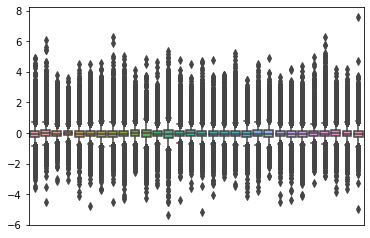

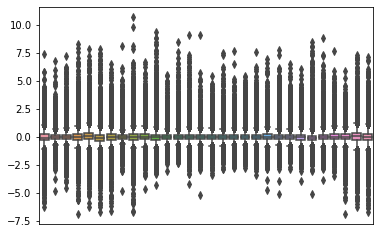

In [43]:
df = df.sample(frac=1)
pldf = get_n_class(df, 0, 30).T
boxplot_df(pldf)

pldf = get_n_class(df, 1, 30).T
boxplot_df(pldf)

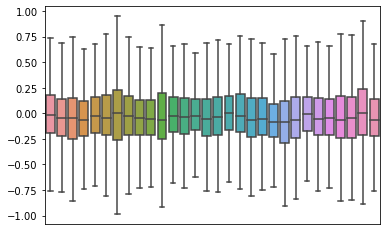

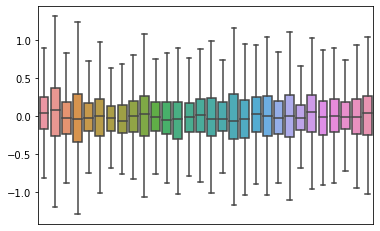

In [44]:
df = df.sample(frac=1)
pldf = get_n_class(df, 0, 30).T
boxplot_df(pldf, include_outliers=False)

pldf = get_n_class(df, 1, 30).T
boxplot_df(pldf, include_outliers=False)

In [45]:
path = "/home/colombelli/Documents/datasets/lung cancer/GSE10072/"
gse_code = "GSE10072"

gse = GEOparse.get_GEO(geo=gse_code, destdir=path)

20-Oct-2020 18:46:34 DEBUG utils - Directory /home/colombelli/Documents/datasets/lung cancer/GSE10072/ already exists. Skipping.
20-Oct-2020 18:46:34 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE10nnn/GSE10072/soft/GSE10072_family.soft.gz to /home/colombelli/Documents/datasets/lung cancer/GSE10072/GSE10072_family.soft.gz
100%|██████████| 25.6M/25.6M [00:14<00:00, 1.81MB/s]
20-Oct-2020 18:46:51 DEBUG downloader - Size validation passed
20-Oct-2020 18:46:51 DEBUG downloader - Moving /tmp/tmpkgri0we6 to /home/colombelli/Documents/datasets/lung cancer/GSE10072/GSE10072_family.soft.gz
20-Oct-2020 18:46:51 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE10nnn/GSE10072/soft/GSE10072_family.soft.gz
20-Oct-2020 18:46:51 INFO GEOparse - Parsing /home/colombelli/Documents/datasets/lung cancer/GSE10072/GSE10072_family.soft.gz: 
20-Oct-2020 18:46:51 DEBUG GEOparse - DATABASE: GeoMiame
20-Oct-2020 18:46:51 DEBUG GEOparse - SERIES: GSE10072


In [46]:
gpl = next(iter(gse.gpls.values())).table
gpl

,ID,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
0,1007_s_at,U48705,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1,1053_at,M87338,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
2,117_at,X51757,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
3,121_at,X69699,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
4,1255_g_at,L36861,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22278,AFFX-ThrX-5_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,B. subtilis /GEN=thrC /DB_XREF=gb:X04603.1 /NO...,AFFX-ThrX-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22279,AFFX-ThrX-M_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,"B. subtilis /GEN=thrC, thrB /DB_XREF=gb:X04603...",AFFX-ThrX-M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22280,AFFX-TrpnX-3_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,"B. subtilis /GEN=trpC, trpF /DB_XREF=gb:K01391...",AFFX-TrpnX-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22281,AFFX-TrpnX-5_at,NaN,--Control,Homo sapiens,"Oct 6, 2014",Control sequence,Affymetrix Proprietary Database,"B. subtilis /GEN=trpE, trpD /DB_XREF=gb:K01391...",AFFX-TrpnX-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df = process_gse(gse, gpl, 'ID')
df

Building gsm dataframe...
Building translation dictionary...
Erasing /// genes symbols (considers the first option)...


ID_REF,DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,CYP2E1,...,GALR3,MINOS1-NBL1,NUS1P3,MROH7-TTC4,RBM12B,LOC102725263,FAM86B1,SNHG17,LOC100505915,NPEPL1
GSM254625,10.929071,6.948867,8.786485,6.852304,6.107564,8.861774,6.562683,5.962803,8.848925,5.674536,...,8.504007,10.919858,5.046881,8.202199,5.124705,6.721035,7.864663,7.546416,5.456851,6.739127
GSM254626,10.022758,6.815021,8.098738,6.894411,6.170747,9.404475,6.901937,6.282109,8.733786,5.904562,...,8.545987,11.082427,4.844787,8.220775,5.850746,6.943635,8.163796,7.457462,5.603934,6.482929
GSM254627,10.392993,7.543393,8.130723,7.334652,6.501881,8.452138,6.721745,6.023964,9.060864,6.060432,...,9.114162,10.318475,5.170190,8.256925,5.774300,7.679758,8.911073,8.930098,5.568902,6.665877
GSM254628,9.791912,6.633125,8.154442,7.015587,6.397341,8.961077,6.846579,6.592644,8.731077,5.963819,...,8.725044,10.726853,5.063049,7.900385,5.243740,7.070959,8.165572,7.838409,5.544128,6.442464
GSM254629,10.772909,6.834786,7.881942,7.102847,6.324919,9.094380,6.817670,6.039554,7.728552,6.047362,...,9.089330,9.359410,5.105125,7.925461,5.228703,7.253198,9.286352,7.632973,5.704178,6.662889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM254727,10.192022,6.663395,8.293713,7.006362,6.058558,9.427757,6.924731,6.322461,8.635310,5.740982,...,8.620803,11.223895,5.035071,8.277886,4.743653,6.934373,8.255893,7.804502,5.868327,7.236626
GSM254728,10.868511,6.785395,8.503953,7.106336,6.038187,8.947336,6.775181,5.879148,8.576593,5.863556,...,8.675699,11.123912,4.884133,8.291751,5.292930,6.891131,8.685722,7.970281,5.906656,7.071992
GSM254729,10.821127,6.661641,8.090105,7.439502,6.323261,8.950721,6.907482,6.094748,8.435064,6.109103,...,8.868554,10.467192,5.099250,8.455712,5.885347,7.308757,8.290354,7.990764,5.897490,7.104698
GSM254730,10.099995,6.634952,8.644759,7.184139,6.278875,9.650836,7.084302,6.287596,8.612904,5.941329,...,8.623561,11.433793,4.758137,8.105907,5.173467,7.032080,8.275882,7.885964,5.766097,7.043918
